In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")






In [2]:
df=pd.read_csv("Estimated Area By Size Class And Land Use.csv")

In [3]:
df.head()

,ROWID,Country,State lgd code,State,District lgd code,District,YearCode,Year,Social group type,Land area size,Category of holdings,Net area sown,Area under current fallows,Net area cultivated,Uncultivated area
0,1,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(0.5-1.0),Marginal,11.197,0.294,11.491,0.409
1,2,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(10.0-20.0),Large,21.750,0.000,21.750,0.000
2,3,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(1.0-2.0),Small,10.250,0.000,10.250,0.000
3,4,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(2.0-3.0),Semi-Medium,25.700,0.000,25.700,0.000
4,5,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,20 & Above,Large,26.050,49.300,75.350,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29960 entries, 0 to 29959
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ROWID                       29960 non-null  int64  
 1   Country                     29960 non-null  object 
 2   State lgd code              29960 non-null  int64  
 3   State                       29960 non-null  object 
 4   District lgd code           29960 non-null  int64  
 5   District                    29960 non-null  object 
 6   YearCode                    29960 non-null  int64  
 7   Year                        29960 non-null  object 
 8   Social group type           29960 non-null  object 
 9   Land area size              29960 non-null  object 
 10  Category of holdings        29960 non-null  object 
 11  Net area sown               28360 non-null  float64
 12  Area under current fallows  28360 non-null  float64
 13  Net area cultivated         283

In [5]:
df.shape

(29960, 15)

In [6]:
df.isnull().sum()

ROWID                            0
Country                          0
State lgd code                   0
State                            0
District lgd code                0
District                         0
YearCode                         0
Year                             0
Social group type                0
Land area size                   0
Category of holdings             0
Net area sown                 1600
Area under current fallows    1600
Net area cultivated           1600
Uncultivated area             1600
dtype: int64

In [7]:
# Check for missing values
if df.isnull().sum().any():
    print("Missing values detected. Filling missing values with appropriate strategies...")
    df.fillna(df.mode().iloc[0], inplace=True)

Missing values detected. Filling missing values with appropriate strategies...


In [8]:
df['Land area size'].value_counts()

(0.5-1.0)      2996
(10.0-20.0)    2996
(1.0-2.0)      2996
(2.0-3.0)      2996
20 & Above     2996
(3.0-4.0)      2996
(4.0-5.0)      2996
(5.0-7.5)      2996
(7.5-10.0)     2996
Below 0.5      2996
Name: Land area size, dtype: int64

In [9]:
# Function to preprocess 'Land area size'
def preprocess_land_area(size):
    # Handle range values like "(0.5-1.0)"
    if "-" in size:
        lower, upper = map(float, size.strip("()").split("-"))
        return (lower + upper) / 2  # Return the midpoint of the range
    # Handle special cases like "20 & Above"
    elif "Above" in size:
        return 20  # Assign a representative value for "20 & Above"
    # Handle cases like "Below 0.5"
    elif "Below" in size:
        return 0.5  # Assign a value for "Below 0.5"
    else:
        return np.nan  # Return NaN for unexpected values
df['Land area size'] = df['Land area size'].apply(preprocess_land_area)

In [10]:
df.head()

,ROWID,Country,State lgd code,State,District lgd code,District,YearCode,Year,Social group type,Land area size,Category of holdings,Net area sown,Area under current fallows,Net area cultivated,Uncultivated area
0,1,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,0.75,Marginal,11.197,0.294,11.491,0.409
1,2,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,15.00,Large,21.750,0.000,21.750,0.000
2,3,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,1.50,Small,10.250,0.000,10.250,0.000
3,4,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,2.50,Semi-Medium,25.700,0.000,25.700,0.000
4,5,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,20.00,Large,26.050,49.300,75.350,0.000


In [11]:
# One-hot encoding for categorical variables
categorical_cols = ['Category of holdings', 'Social group type']
encoded_df = pd.get_dummies(df[categorical_cols], drop_first=True)


In [12]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Combine numeric and encoded data
numeric_cols = ['Land area size', 'Net area sown', 'Area under current fallows', 'Net area cultivated', 'Uncultivated area']
final_data = pd.concat([df[numeric_cols], encoded_df], axis=1)


In [13]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data)

In [14]:
# Elbow Method to find optimal number of clusters
inertia = []
range_n_clusters = range(1, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

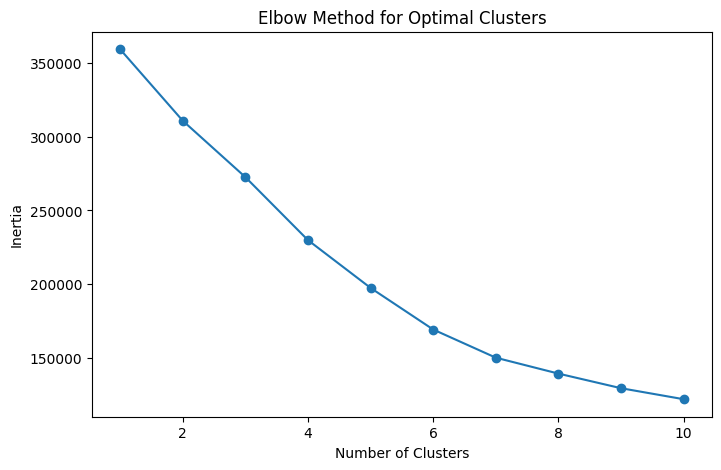

In [15]:
# Plotting the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
k= 6
kmeans = KMeans(n_clusters=k, random_state=42)
Cluster = kmeans.fit_predict(scaled_data)
df['Cluster'] = Cluster

In [17]:
# Perform PCA for visualization (optional)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

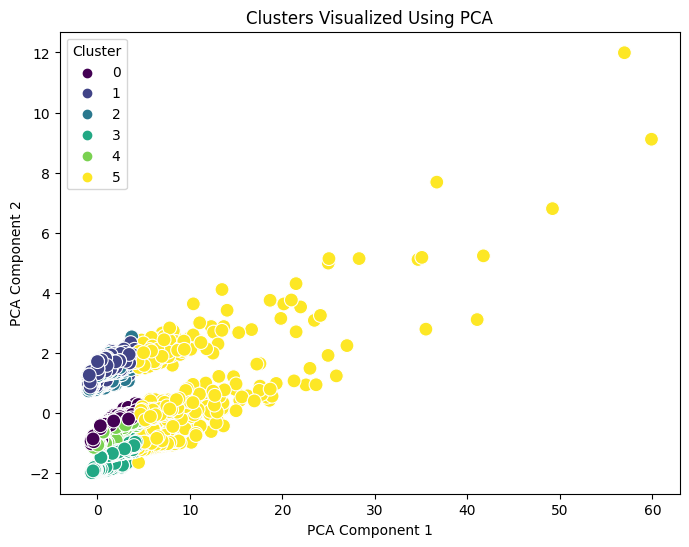

In [18]:
# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clusters Visualized Using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [19]:
# Display segmented data
print(df[['ROWID', 'Land area size', 'Net area sown', 'Cluster']])

       ROWID  Land area size  Net area sown  Cluster
0          1            0.75         11.197        3
1          2           15.00         21.750        2
2          3            1.50         10.250        4
3          4            2.50         25.700        0
4          5           20.00         26.050        2
...      ...             ...            ...      ...
29955  29956            3.50       1670.411        0
29956  29957            4.50       1098.073        1
29957  29958            6.25       1336.589        1
29958  29959            8.75        565.751        1
29959  29960            0.50        960.288        3

[29960 rows x 4 columns]


In [20]:
from sklearn.metrics import silhouette_score

In [21]:
score = silhouette_score(scaled_data, Cluster)
print(f"Silhouette Score for k={k}: {score}")

Silhouette Score for k=6: 0.4028687818306466


In [22]:
df.groupby('Cluster').mean()


,ROWID,State lgd code,District lgd code,YearCode,Land area size,Net area sown,Area under current fallows,Net area cultivated,Uncultivated area,PCA1,PCA2
Cluster,,,,,,,,,,,
0,14841.451862,17.812425,12723.564270,2015.0,3.004719,3708.085887,296.352249,4004.438136,152.304157,-0.012093,-0.784044
1,14969.162366,17.947944,12200.134648,2015.0,6.504817,2204.478527,185.000033,2389.478560,115.466737,-0.422241,1.182981
2,15010.304962,17.994786,12144.355761,2015.0,17.507149,1154.349038,130.795694,1285.144733,69.092371,-0.549155,1.157072
3,14926.135800,17.905680,12761.496386,2015.0,0.624742,3981.679502,299.007652,4280.687153,116.813737,0.056709,-1.783568
4,14666.302158,17.615827,13315.607554,2015.0,1.500000,5432.180042,385.449452,5817.629495,181.027802,0.398047,-0.953726
5,17640.237898,20.934993,7286.525588,2015.0,3.289765,74365.647731,6707.671025,81073.318756,3418.966686,7.809854,0.283201


Each cluster represents different types of land use:

Cluster 0: Medium-sized holdings with high land utilization and moderate fallows.
Cluster 1: Larger holdings with moderate cultivation and low fallows.
Cluster 2: Very large holdings with less cultivated land and more fallows.
Cluster 3: Small holdings with high land utilization and moderate fallows.
Cluster 4: Small to medium holdings with intense land use and moderate fallows.
Cluster 5: Very large commercial holdings with high land utilization and a significant amount of fallow land.

- Targeted Agricultural Policies: Understanding which types of holdings (small, medium, large) are more efficient or in need of support (e.g., irrigation, crop management) based on their cultivation and fallow patterns.

- Resource Allocation: Identifying areas that need more resources (e.g., subsidies, training for farmers) or optimizing land use through targeted interventions.

- Market Strategy: For agricultural businesses or organizations, this clustering can help tailor marketing efforts for products and services based on the land type and cultivation practices in each region.

- Sustainability Initiatives: Recognizing patterns in fallow land and intensive cultivation can help in promoting sustainable agricultural practices, focusing on areas with high fallows or less efficient land use.

- Forecasting and Planning: Predict future trends in agricultural production based on cluster behavior, aiding in better planning for crops, land use, and resource distribution.

In [23]:
# Define financial parameters
price_per_unit = 500  # Price per unit (in Rs.)
fixed_cost = 2000     # Fixed monthly cost (in Rs.)

In [24]:
# Calculate revenue for each row
df['Revenue'] = price_per_unit * df['Net area cultivated'] - fixed_cost


In [25]:
df.head()

,ROWID,Country,State lgd code,State,District lgd code,District,YearCode,Year,Social group type,Land area size,Category of holdings,Net area sown,Area under current fallows,Net area cultivated,Uncultivated area,Cluster,PCA1,PCA2,Revenue
0,1,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,0.75,Marginal,11.197,0.294,11.491,0.409,3,-0.348949,-1.800884,3745.5
1,2,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,15.00,Large,21.750,0.000,21.750,0.000,2,-0.682832,0.900988,8875.0
2,3,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,1.50,Small,10.250,0.000,10.250,0.000,4,-0.112223,-0.980256,3125.0
3,4,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,2.50,Semi-Medium,25.700,0.000,25.700,0.000,0,-0.397765,-0.863000,10850.0
4,5,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,20.00,Large,26.050,49.300,75.350,0.000,2,-0.753280,1.373162,35675.0


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
# Fit Agglomerative/Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_data)


In [28]:
silhouette_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
print(f"Silhouette Score (Hierarchical): {silhouette_hierarchical}")

Silhouette Score (Hierarchical): 0.4018689568152664


In [29]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
DBSCAN_Cluster = dbscan.fit_predict(scaled_data)

print(f"DBSCAN_Cluster value : {DBSCAN_Cluster}")

DBSCAN_Cluster value : [ 0  1  2 ... 23 23 18]


In [30]:
np.unique(DBSCAN_Cluster)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

- While technically any problem can be considered a "cluster problem" with more than 10 clusters, having too many clusters (significantly above 10) can often lead to issues with interpretability and practical application in most real-world scenarios; meaning the insights gained from the clusters may be too nuanced and difficult to understand or act upon effectively.

In [31]:
# df.to_csv("clustered_data.csv", index=False)